In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./resource/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


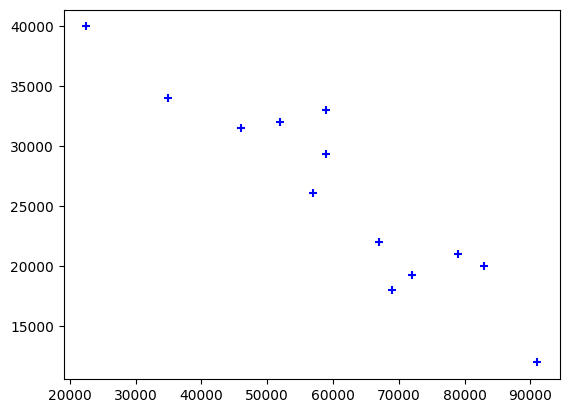

In [10]:
plt.scatter(df['Mileage'], df['Sell Price($)'], color='blue', marker='+')


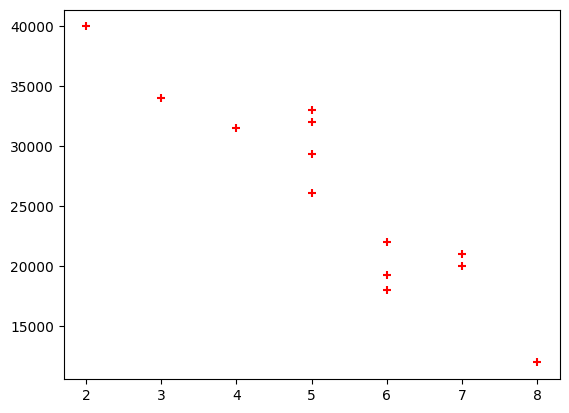

In [8]:
plt.scatter(df['Age(yrs)'], df['Sell Price($)'],color='red', marker='+')

In [11]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,False,False,True


In [13]:
merged = pd.concat([df, dummies], axis='columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,False,True,False
1,BMW X5,35000,34000,3,False,True,False
2,BMW X5,57000,26100,5,False,True,False
3,BMW X5,22500,40000,2,False,True,False
4,BMW X5,46000,31500,4,False,True,False
5,Audi A5,59000,29400,5,True,False,False
6,Audi A5,52000,32000,5,True,False,False
7,Audi A5,72000,19300,6,True,False,False
8,Audi A5,91000,12000,8,True,False,False
9,Mercedez Benz C class,67000,22000,6,False,False,True


In [14]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [15]:
X = final.drop(['Sell Price($)'], axis='columns')
y = final['Sell Price($)']

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [17]:
model.predict(X)

array([18705.2723644 , 35286.78445645, 24479.19112468, 41245.76426391,
       29882.98779056, 28023.6135243 , 30614.46818502, 21879.57266964,
       12182.34562104, 26183.72387884, 18929.31674102, 20409.80511857,
       30477.15426156])

In [18]:
model.predict([[45000, 4, 0, 0]])

/home/javedjarif/Desktop/workdir/ML/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [19]:
model.score(X, y)

0.9417050937281082

In [20]:
model.predict([[86000, 7, 0, 1]])

/home/javedjarif/Desktop/workdir/ML/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])